In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%config InlineBackend.figure_format='svg'

/home/cristobal/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/cristobal/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/cristobal/anaconda3/lib/python3.5/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/cristobal/anaconda3/lib/python3.5/site-packages/tensorflow/python/f

In [2]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()

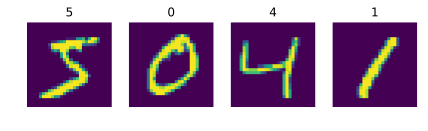

In [3]:
fig, axes=plt.subplots(1,4,figsize=(7,3))
for img,label, ax in zip(x_train[:4],y_train[:4],axes):
    ax.set_title(label)
    ax.imshow(img)
    ax.axis('off')
plt.show()

In [4]:
print('train images: {}'.format(x_train.shape))
print('train labels: {}'.format(y_train.shape))
print('test images: {}'.format(x_test.shape))
print('test labels: {}'.format(y_test.shape))

train images: (60000, 28, 28)
train labels: (60000,)
test images: (10000, 28, 28)
test labels: (10000,)


In [5]:
print(x_train.shape)

(60000, 28, 28)


In [6]:
x_train=x_train.reshape(60000,28*28)/255
x_test=x_test.reshape(10000,28*28)/255
with tf.Session() as sesh:
    y_train=sesh.run(tf.one_hot(y_train,10))
    y_test=sesh.run(tf.one_hot(y_test,10))

In [7]:
y_train[:4]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [8]:
learning_rate=0.01
epochs=20
batch_size=100
batches=int(x_train.shape[0]/batch_size)

In [9]:
# want the equation Y=sigma(XW+B)
X=tf.placeholder(tf.float32,[None,784])
Y=tf.placeholder(tf.float32,[None,10])
W=tf.Variable(0.01 * np.random.randn(784,10).astype(np.float32))
B=tf.Variable(0.01 * np.random.randn(10).astype(np.float32))

In [10]:
pred=tf.nn.softmax(tf.add(tf.matmul(X,W),B))
cost=tf.reduce_mean(-tf.reduce_sum(Y*tf.log(pred),axis=1))
optimizer=tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

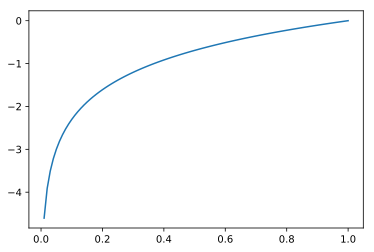

In [11]:
x=np.linspace(1/100,1,100)#to understand the cost function
plt.plot(x,np.log(x))
plt.show()

epoch 0 cost 0.2977428734302521
epoch 2 cost 0.4969246983528137
epoch 4 cost 0.43577271699905396
epoch 6 cost 0.41112077236175537
epoch 8 cost 0.44581830501556396
epoch 10 cost 0.21425919234752655
epoch 12 cost 0.5737953782081604
epoch 14 cost 0.4221421778202057
epoch 16 cost 0.3586781322956085
epoch 18 cost 0.2359170913696289
accuracy  0.9036


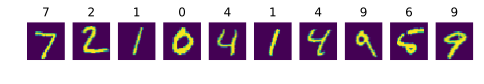

In [12]:
with tf.Session() as sesh:
    sesh.run(tf.global_variables_initializer())
    for epoch in range(epochs):
        for i in range(batches):
            offset=i*epoch
            x=x_train[offset:offset+batch_size]
            y=y_train[offset:offset+batch_size]
            sesh.run(optimizer,feed_dict={X:x,Y:y})
            c=sesh.run(cost,feed_dict={X:x,Y:y})
        if not epoch%2:
            print('epoch {} cost {}'.format(epoch,c))
            
    correct_pred=tf.equal(tf.argmax(pred,1),tf.argmax(Y,1))
    accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))
    acc=accuracy.eval({X:x_test,Y:y_test})
    print('accuracy ',acc)
    fig,axes=plt.subplots(1,10,figsize=(8,4))
    for img,ax in zip(x_test[:10],axes):
        guess=np.argmax(sesh.run(pred,feed_dict={X:[img]}))
        ax.set_title(guess)
        ax.imshow(img.reshape((28,28)))
        ax.axis('off')
    plt.show()